# Data Visualization Using `plotnine`

The Palmer Penguins dataset had a variety of column types with which to explore some nice visualizations. The `mtcars` dataset is another popular dataset for doing some simple data work, but does not contain the same types of variables.

Run the following code to load the `mtcars` dataset and explore the observations and variables contained within. To learn more about this dataset check out [this site](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

In [2]:
import statsmodels.api as sm
import pandas as pd

mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data
df = pd.DataFrame(mtcars)

In [3]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


The statement "the `mtcars` dataset does not contain the same types of variables as the penguins dataset" is a little true and a little false. There are no variables that contain text values, BUT there are variables that it makes sense to consider categorical variables. In most situations, it makes sense to treat the values of categorical variables as text values instead of numeric values.

Use the `astype()` method to convert the categorical variables of the `mtcars` (df) dataset to have text values in the code chunk below. We've done one for you!

In [5]:
df["am"] = df["am"].astype(str)

# Convert the other variables below
df['vs'] = df['vs'].astype(str)


In [6]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


If you print out your new dataset, is it clear that the variables have been converted to text values? If so, how can you tell?
   
It is not clear to me from the above print that the variables "am" and "vs" have been converted to text values because there is 
no visual change to how they are expressed.
    
It should also be clear by how `plotnine` treats these variables.

1. Create side-by-side boxplots of the `mpg` variable by the different values of the `am` variable. What happens if you convert the `am` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

2. Create overlaid histograms of the `hp` variable for the different values of the `cyl` variable. What happens if you convert the `cyl` variable back to float values and then try to create this same plot? Explain the differences between the two plots.

/Users/jackmuoio/Library/Python/3.9/lib/python/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


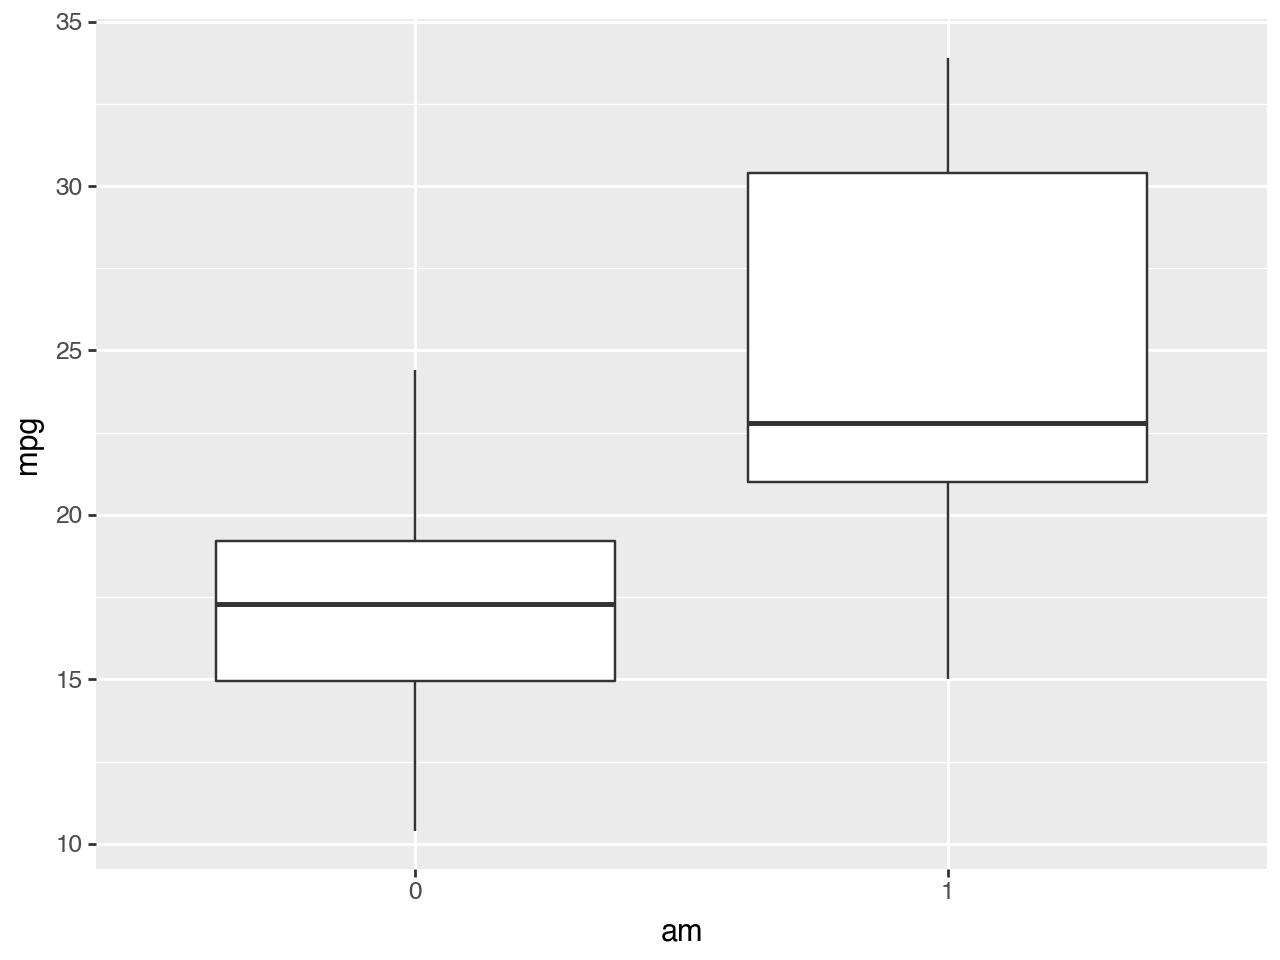

/Users/jackmuoio/Library/Python/3.9/lib/python/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


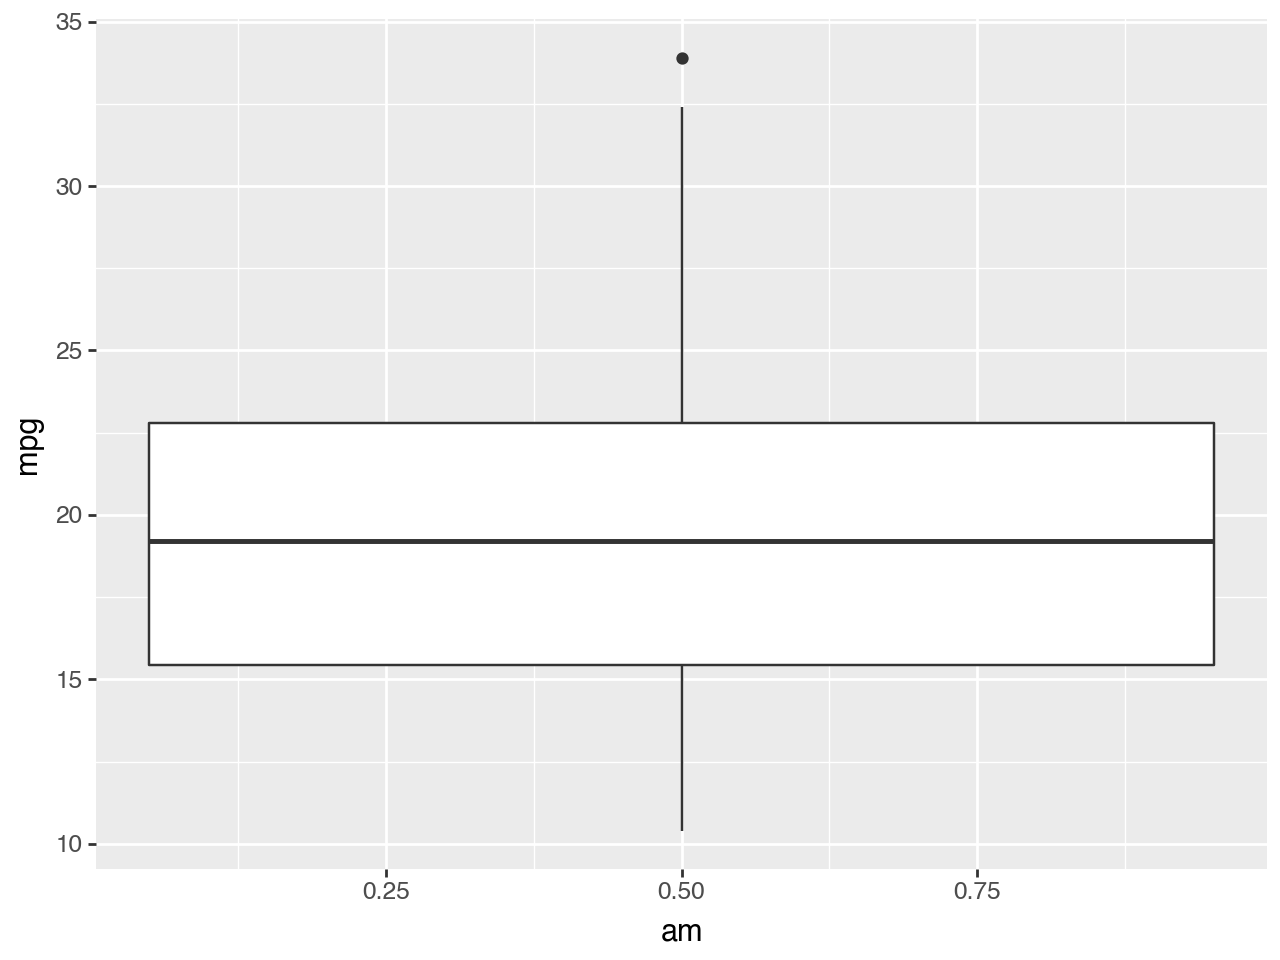

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [12]:
# Create plot for (1) here

import plotnine as p9

#categorical
plot_category = (p9.ggplot(data=df,mapping=p9.aes(x=df["am"],y=df["mpg"]))
         + p9.geom_boxplot()) 
plot_float = (p9.ggplot(data=df,mapping=p9.aes(x=df["am"].astype(float),y=df["mpg"]))
         + p9.geom_boxplot()) 

plot_category, plot_float

In the first plot where the am variable is categorical, it makes it easy to compare different levels of mpg. In the second graph where am is a float, the information and results are not useful because everything has become thrown together and mixed up.

/Users/jackmuoio/Library/Python/3.9/lib/python/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/jackmuoio/Library/Python/3.9/lib/python/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


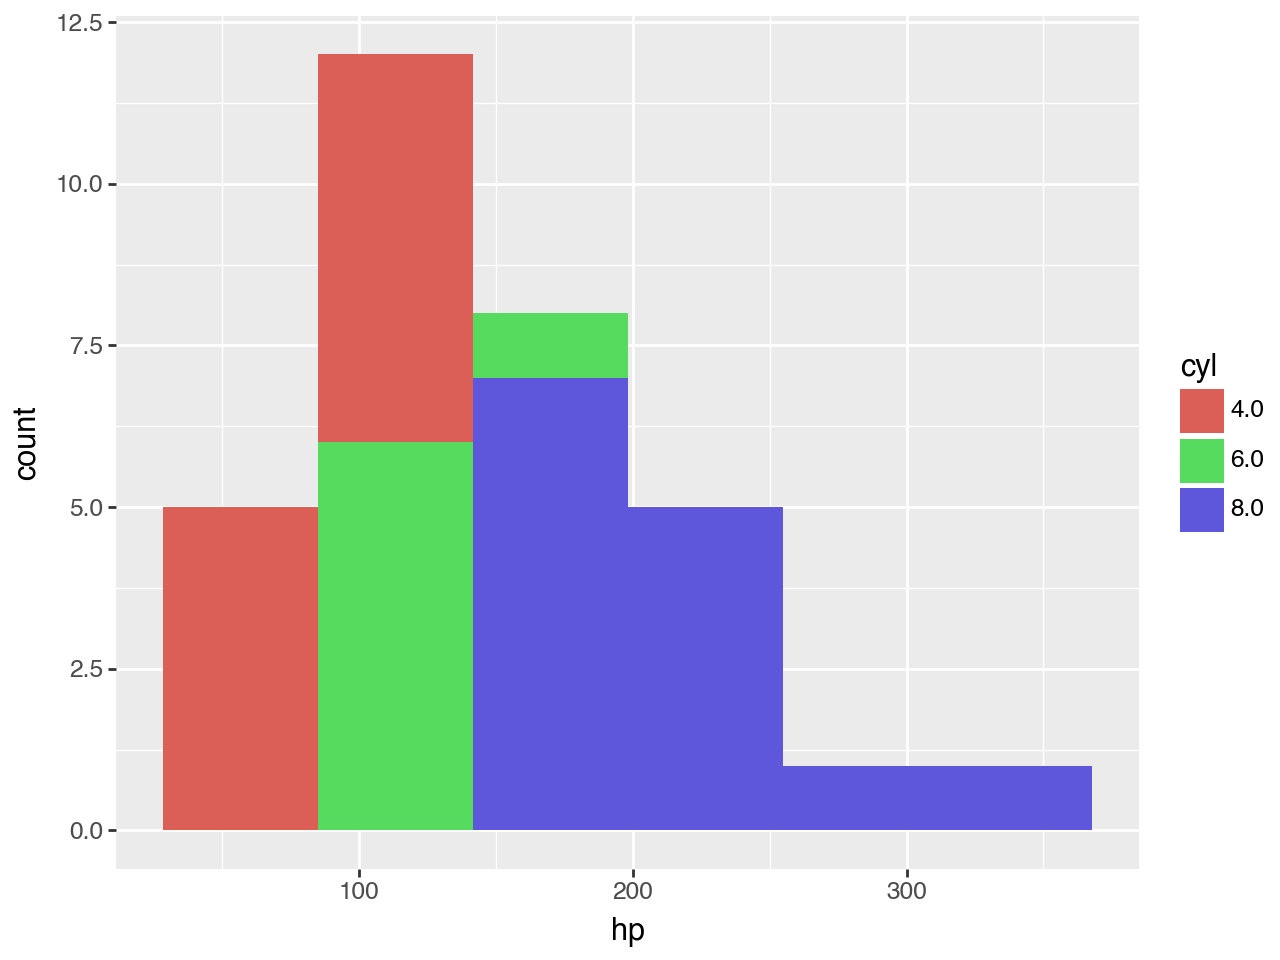

/Users/jackmuoio/Library/Python/3.9/lib/python/site-packages/IPython/lib/pretty.py:778: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/Users/jackmuoio/Library/Python/3.9/lib/python/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.


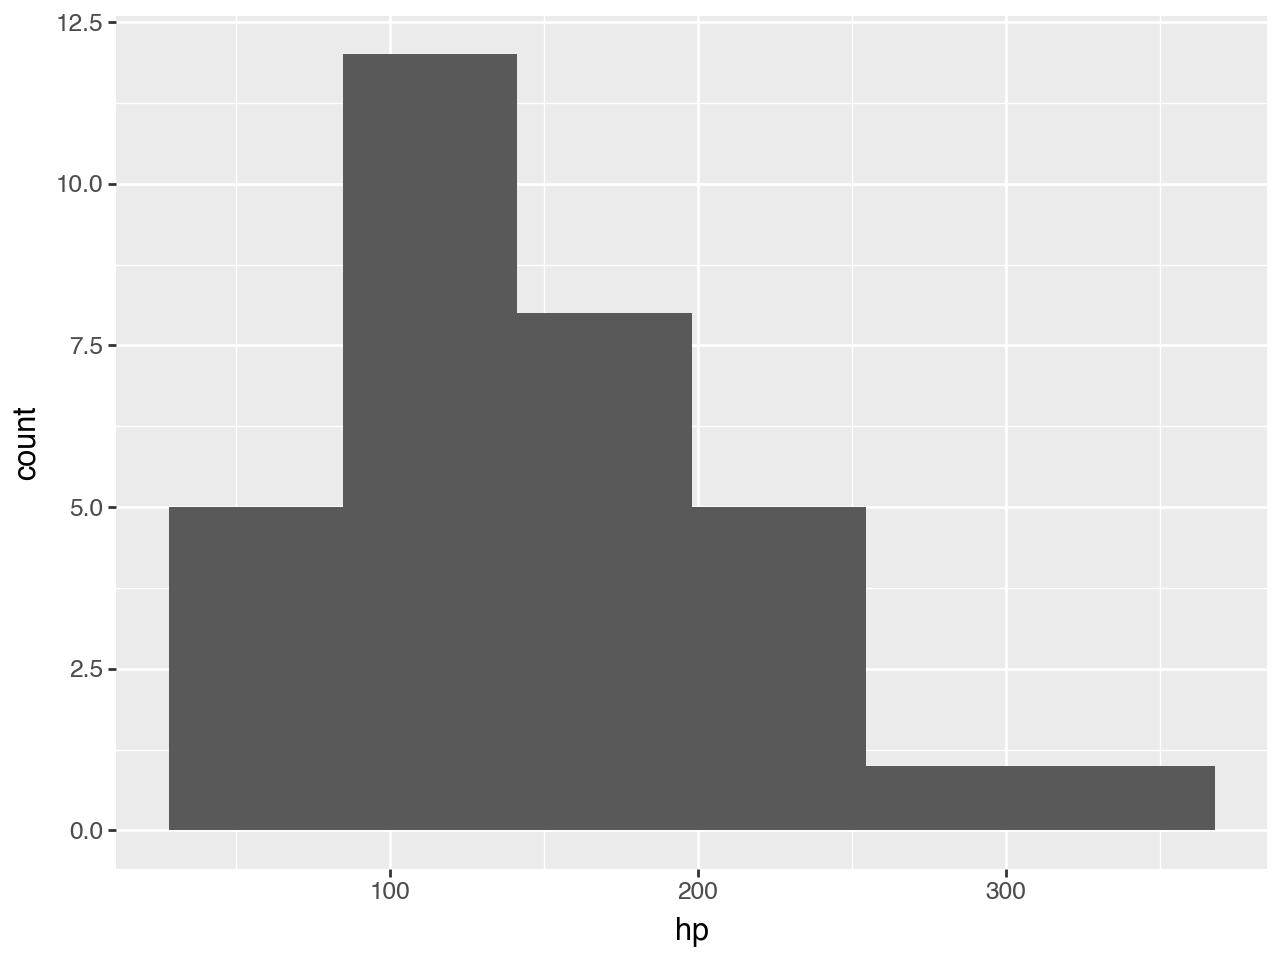

(<Figure Size: (640 x 480)>, <Figure Size: (640 x 480)>)

In [24]:
# Create plot for (2) here

#categorical
df["cyl"] = df["cyl"].astype("str")
overlapping_categorical = (p9.ggplot(df, p9.aes(x="hp", fill="cyl"))
                           + p9.geom_histogram())

#float
df["cyl_float"] = df["cyl"].astype("float")
overlapping_float = (p9.ggplot(df, p9.aes(x="hp", fill="cyl_float"))
                           + p9.geom_histogram())

overlapping_categorical, overlapping_float

Using cyl as a categorical variable, especially in python, allows us to easily distinguish between different cyl levels and compare to hp levels as each level is a different color. If we use cyl as a categorical variable, it does not help us when we look at hp count. 

The 

Some of these variables, like the `cyl` variable, have numeric values that actually make sense as numbers (i.e. the number of cylinders in the engine). However, it doesn't make the most sense to "do math" with this type of variable (e.g. take averages and such) because there are so few different value this can take on AND they're an explicit choice made by the car manufacturer. So, it makes more sense to treat the `cyl` variable as a categorical variable despite it having numeric values.

You will need to keep these kinds of nuances about data in mind as you work with an increasing variety and richness of data, and do more complex things with them.

Choose 3 new `geometries` from the [data-to-viz website](https://www.data-to-viz.com/) for graphs that you'd like to explore using the `mtcars` dataset, and then create those graphs!

In [47]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_float
rownames,,,,,,,,,,,,
Mazda RX4,21.0,6.0,160.0,110,3.90,2.620,16.46,0,1,4,4,6.0
Mazda RX4 Wag,21.0,6.0,160.0,110,3.90,2.875,17.02,0,1,4,4,6.0
Datsun 710,22.8,4.0,108.0,93,3.85,2.320,18.61,1,1,4,1,4.0
Hornet 4 Drive,21.4,6.0,258.0,110,3.08,3.215,19.44,1,0,3,1,6.0
Hornet Sportabout,18.7,8.0,360.0,175,3.15,3.440,17.02,0,0,3,2,8.0


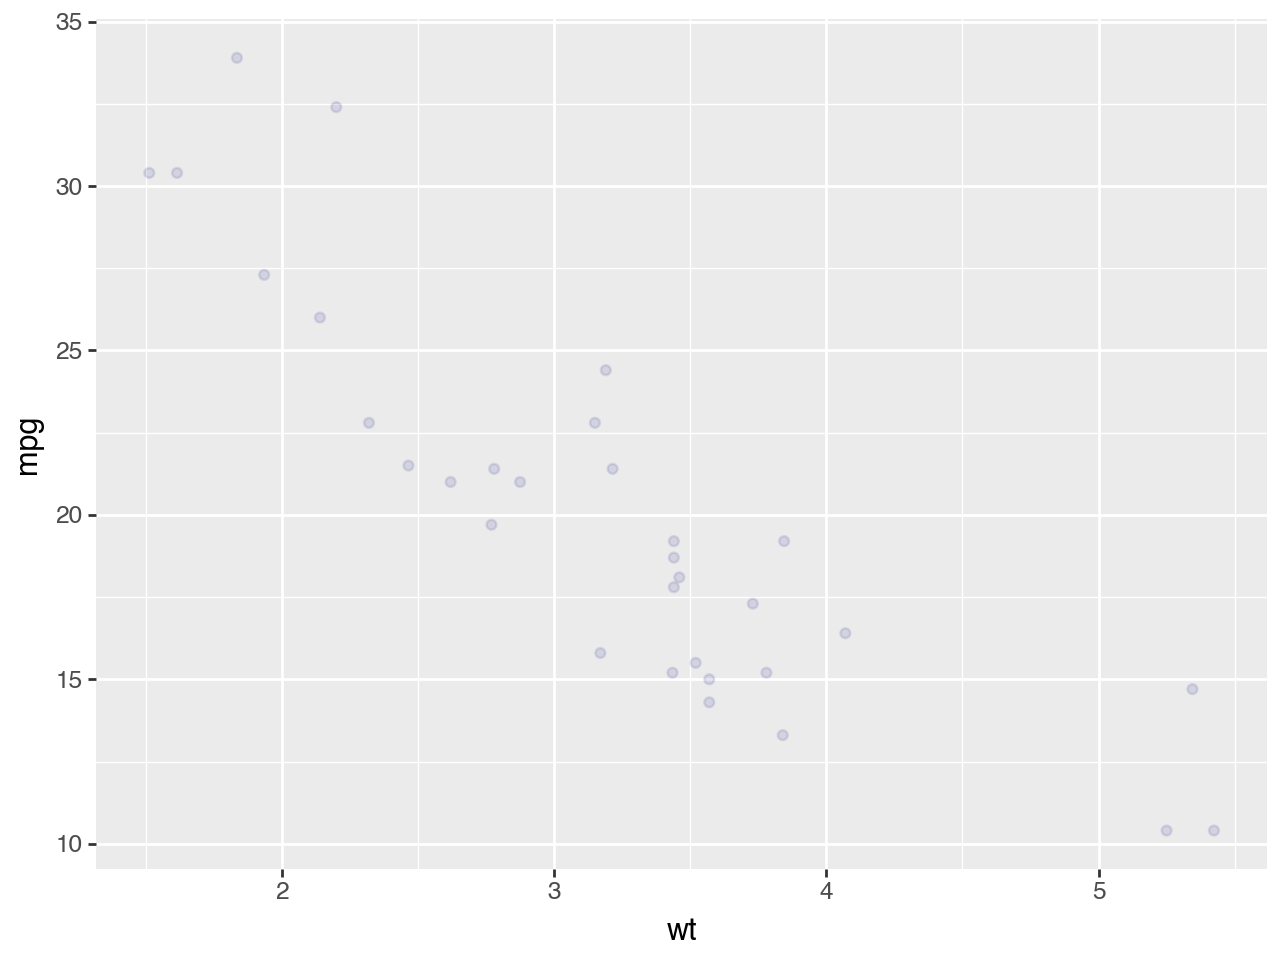

In [29]:
# Create plot with first new geometry here
new_geom1 = (p9.ggplot(data = df, mapping = p9.aes(x = "wt", y = "mpg"))
             + p9.geom_point(alpha = 0.1, color = "navy"))
new_geom1

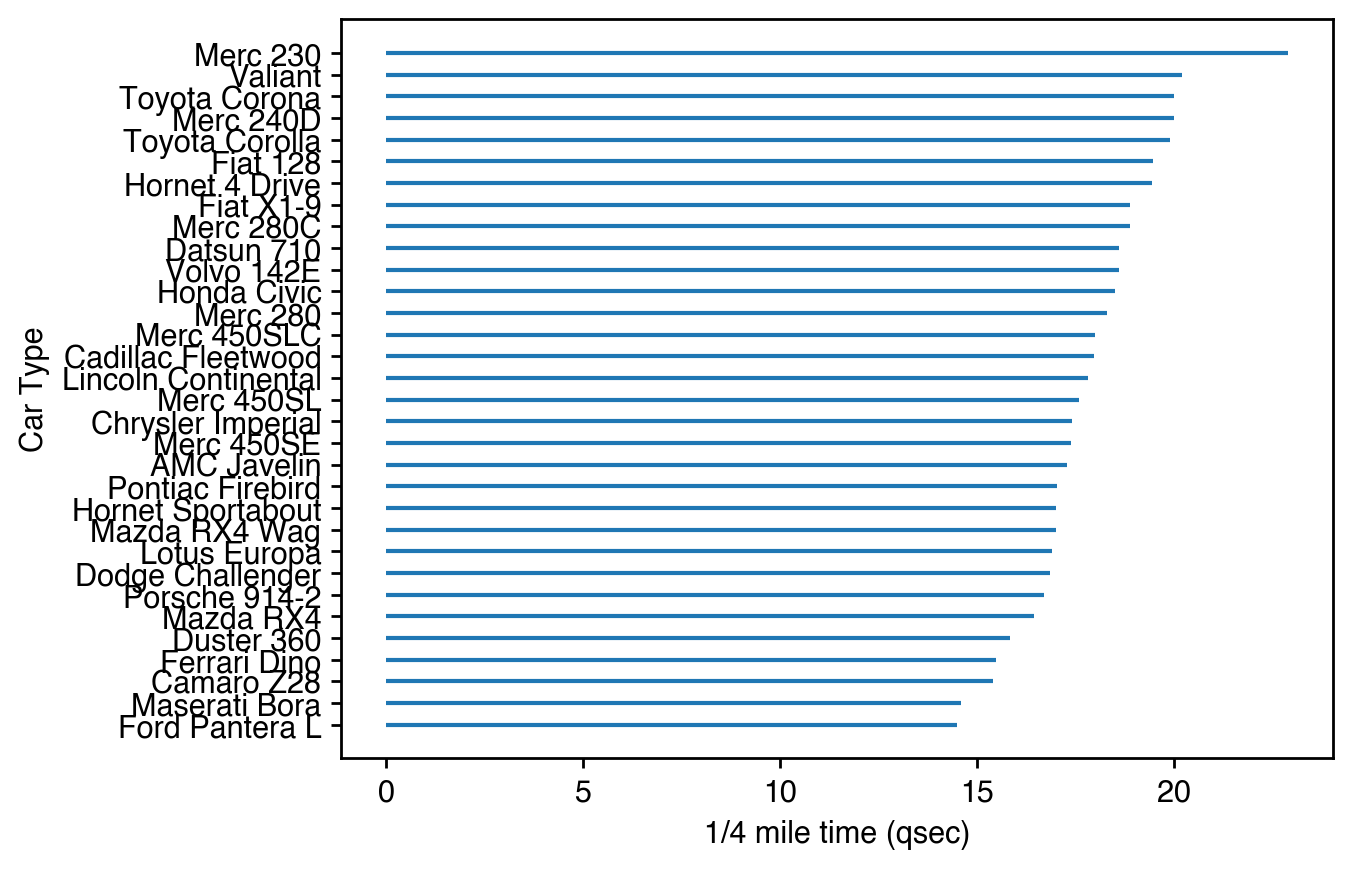

In [39]:
# Create plot with second new geometry here
import matplotlib.pyplot as plt
ordered_df = df.sort_values(by = "qsec")
plt.hlines(y = ordered_df.index, xmin = 0, xmax = ordered_df["qsec"])
plt.xlabel("1/4 mile time (qsec)")
plt.ylabel("Car Type")
plt.show()

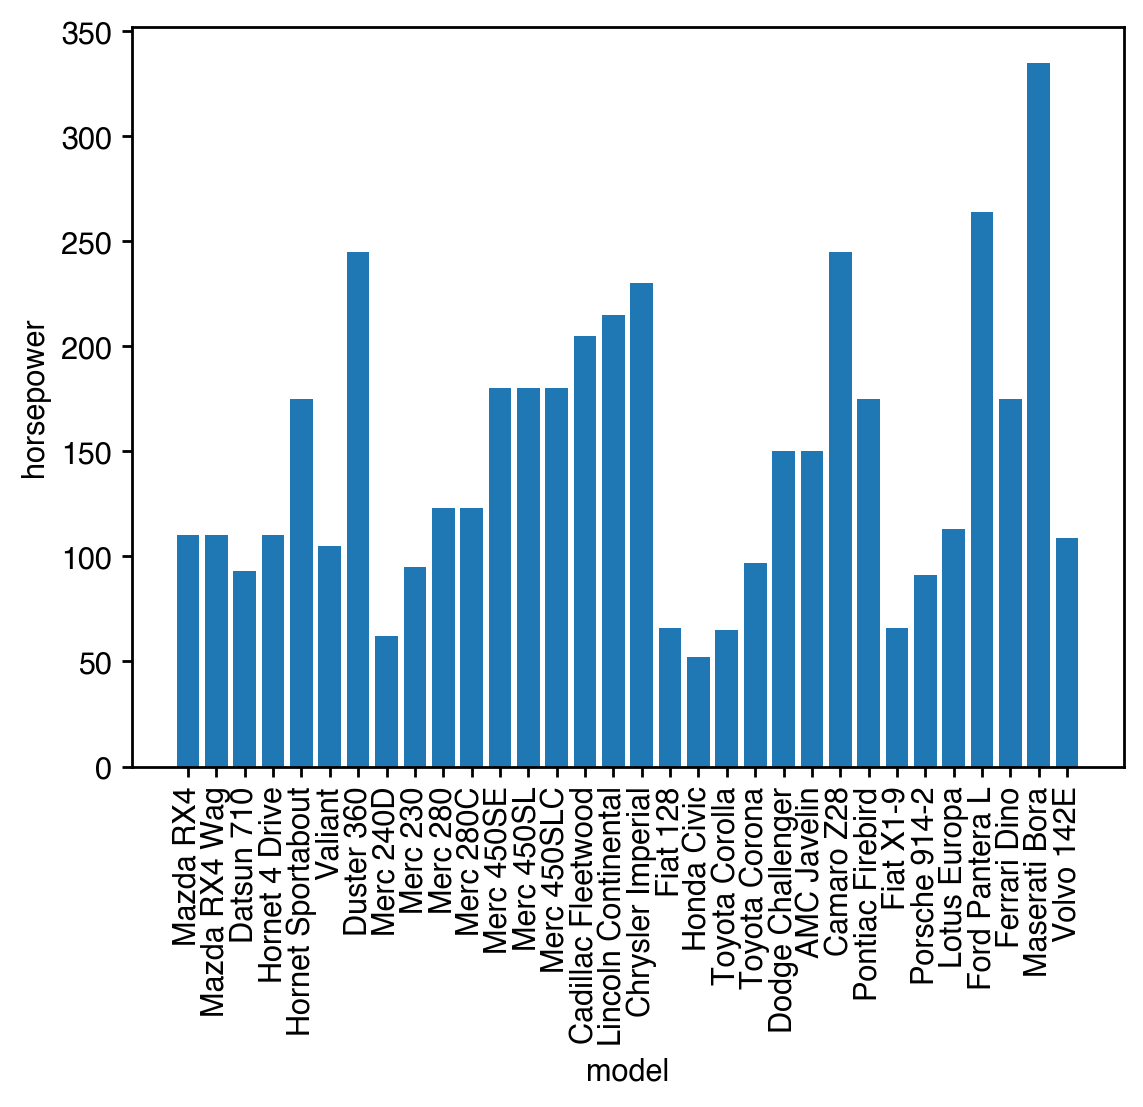

In [50]:
# Create plot with third new geometry here
plt.bar(df.index, df["hp"])

plt.xlabel("model")
plt.ylabel("horsepower")
plt.xticks(df.index, rotation = 90)
plt.show()